XG Boost Regression 
Case Study -1(CS 46)

Data Set: boston_house_prices.csv 

Dependent Variable:  MEDV


In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
os.chdir('D:\\top mentor assignment\\Batch 98 Day 57\\ML Case Studies with Answer\\CS 46 Ans -XG Boost Regression-1\\')

In [3]:
os.getcwd()

'D:\\top mentor assignment\\Batch 98 Day 57\\ML Case Studies with Answer\\CS 46 Ans -XG Boost Regression-1'

In [5]:
df = pd.read_csv('boston_house_prices.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
x= df.iloc[:,:-1].values
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
y= df.iloc[:,-1].values
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [11]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (xtest.shape)

(430, 13)
(76, 13)
(430,)
(76, 13)


In [12]:
reg= LinearRegression()
reg.fit(xtrain,ytrain)
y_pred= reg.predict(xtest)
r2_score(ytest, y_pred)

0.6362007614090666

In [13]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [14]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.89


In [16]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.88


In [17]:
ypred = xgbr.predict(xtest)
print (ypred)

[15.175247  44.919224  27.099453   9.714559  14.4845915 19.32005
 18.81008   20.53871   10.92465   22.434357  13.650269  20.226084
 21.074018  21.266909  16.939266  49.18538   22.128613  25.545704
 18.330782  15.859333  24.427189  19.015808  20.674095   8.427576
 24.317926  20.534685  28.586212  13.510723  23.50906   18.864609
 13.242373  46.834354  31.159555  22.893187  24.641024   8.134965
 22.783598  10.545309  24.829412  13.697326  19.736355  16.562376
 34.96247   24.41876   41.65227   21.856747  22.800556  12.055896
 24.038586  10.04787   20.214294  22.585464  25.660587  18.08096
 21.285526  23.65283   21.365746  33.757404  17.053091  25.35973
 28.890234  23.041569  16.316252  42.158848   8.836348  14.10621
 20.60754   47.53652   18.300182  19.245909   9.647796  22.508915
 15.234759  23.95482   25.197603  20.561739 ]


In [18]:
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)

MSE: 14.96


In [19]:
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 3.87


In [20]:
r2_score(ytest, ypred)

0.8276831042964554

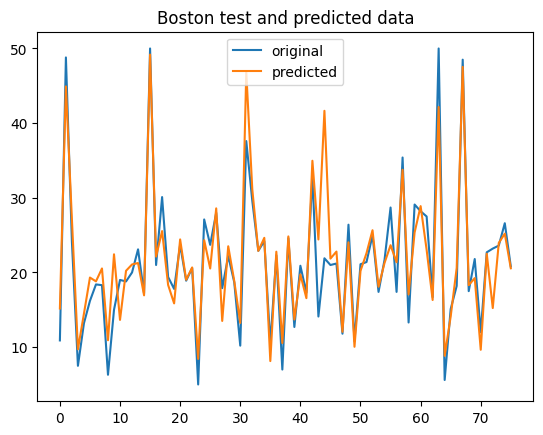

In [21]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()